# Retail Data Analytics by Anthony Rogers




## Importing the packages and files needed:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt



In [53]:
#import datasets
df_stores = pd.read_csv('stores data-set.csv') 
df_features = pd.read_csv('Features data set.csv')
df_sales =  pd.read_csv('sales data-set.csv')

In [54]:
# convert date column to pandas datetime format
df_features["Date"] = pd.to_datetime(df_features["Date"], format="%d/%m/%Y")
df_sales["Date"] = pd.to_datetime(df_sales["Date"], format="%d/%m/%Y")

## 1. Exploring each data set

In [8]:
df_stores.head() 

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [33]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Retreive the statistics for each dataframe

In [11]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [13]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## First we want to look at the store dataset in detail

In [12]:
df_stores.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [40]:
#Checking for duplicates
df_stores.duplicated().sum()

0

In [43]:
#Check unique numbers for each column in store dataset
df_stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [44]:
# Show all unique objects in type column
df_stores['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [45]:
# check null values in stores dataset
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [23]:
# Count each object in the type column
df_stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

- Store type 'A' has the most entries in the data set, followed by type 'B' then type 'C'.
- Lets vizualize it for more clarity.

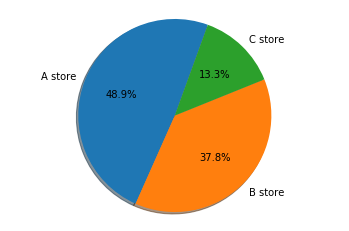

In [2]:
# plot distribution of Store Type
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- I also want to see the general size of each type of store.
- Note: the sizes are determined by the number of products available at each store.

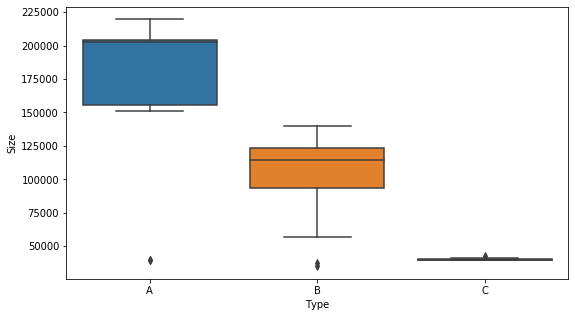

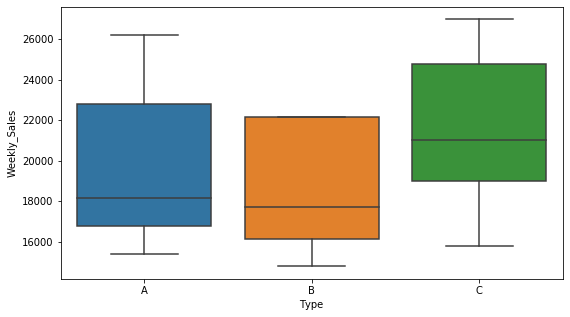

In [74]:
# boxplot for sizes of types of stores
store_type = pd.concat([df_stores['Type'], df_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(9, 5))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

store_sale = pd.concat([df_stores['Type'], df_sales['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(9, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

- According to the top chart, store type 'A' also carries more products compared to the others.
- The bottom chart shows that the larger stores (type 'A') sell more products.
- Next let's look at the other datasets

## Feature Dataset

In [24]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [25]:
df_features.duplicated().sum()

0

In [26]:
df_features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [29]:
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

- There seem to be a lot of missing vaues in this dataset. You will need to drop these later, when attempting to predict future sales. 
- For now we can merge the feature and sales dataset by date.

In [55]:
df_2 = df_features.groupby("Date").agg({"Temperature": "mean",
                               "Fuel_Price": "mean",
                               "CPI": "mean",
                               "Unemployment": "mean",
                               "IsHoliday": "min"})
df_2.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,
2010-02-05,34.037333,2.717844,167.730885,8.619311,False
2010-02-12,34.151333,2.694022,167.825608,8.619311,True
2010-02-19,37.719778,2.672067,167.871686,8.619311,False
2010-02-26,39.243556,2.683933,167.909657,8.619311,False
2010-03-05,42.917333,2.731200,167.947628,8.619311,False


In [56]:
df_3 = df_sales.groupby("Date").agg({"Weekly_Sales" : "sum"})
df_3["Weekly_Sales"] = (df_3["Weekly_Sales"] / 1e6).astype(int)
df_3.head()

,Weekly_Sales
Date,
2010-02-05,49
2010-02-12,48
2010-02-19,48
2010-02-26,43
2010-03-05,46


In [57]:
df_4 = pd.merge(df_2, df_3, on=["Date"], how="left").reset_index()
df_4.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,False,49.0
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,True,48.0
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,False,48.0
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,False,43.0
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,False,46.0


In [58]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          182 non-null    datetime64[ns]
 1   Temperature   182 non-null    float64       
 2   Fuel_Price    182 non-null    float64       
 3   CPI           169 non-null    float64       
 4   Unemployment  169 non-null    float64       
 5   IsHoliday     182 non-null    bool          
 6   Weekly_Sales  143 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(5)
memory usage: 8.8 KB


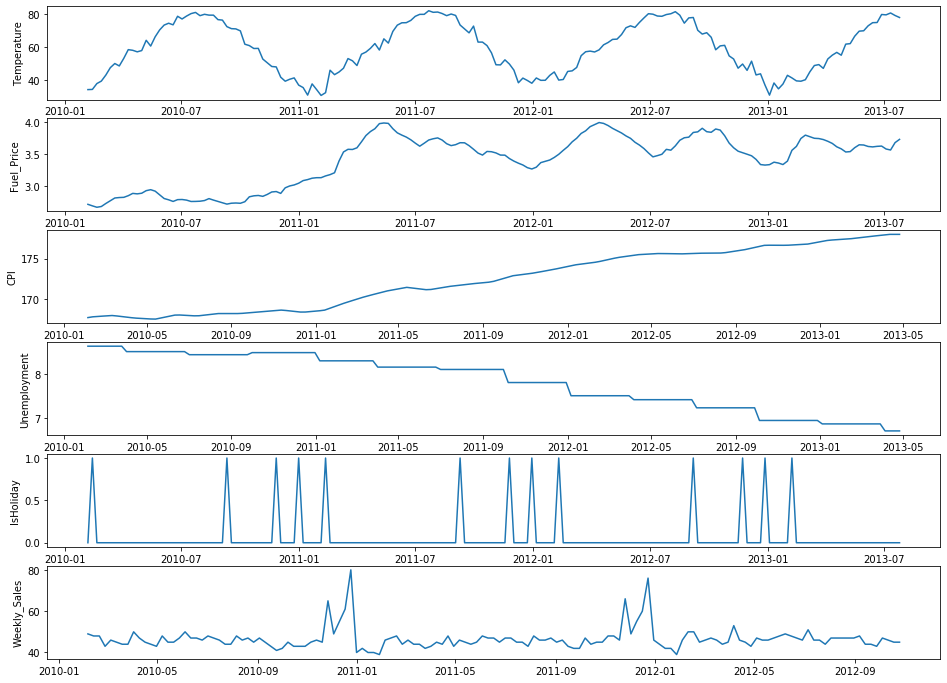

In [59]:
fig = plt.figure(figsize = (16, 12))
count_columns_ex_date = len(df_4.columns[1:])
for idx, col in enumerate(df_4.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(df_4["Date"], df_4[col])
    plt.ylabel(col)

- Now lets look for any correlation between two variables bases on the new dataframe.

[]

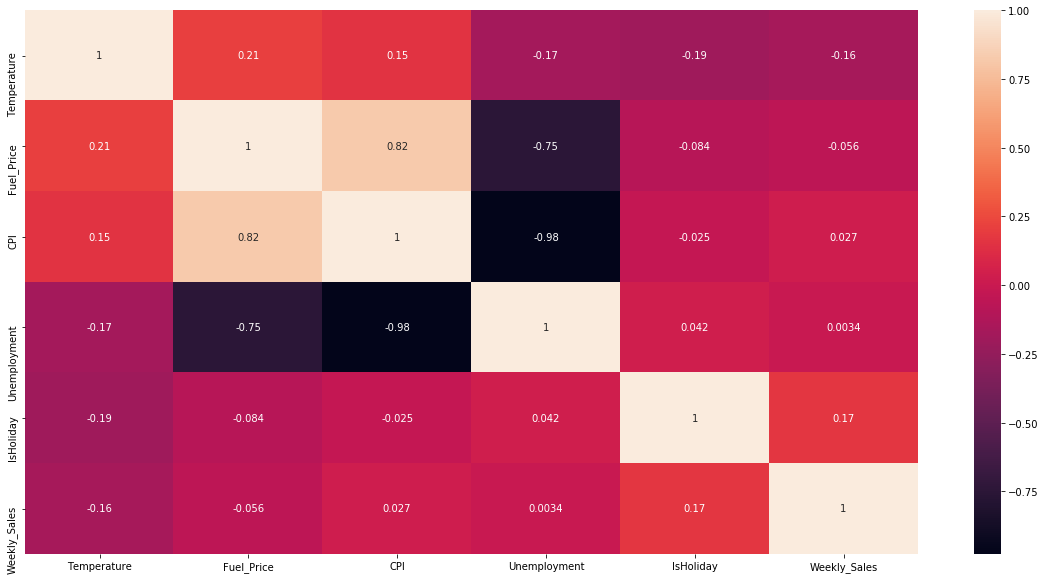

In [22]:
corr = df_2.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.plot()

-As you